In [2]:
import pandas as pd
import numpy as np
from datetime import datetime 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_xls = pd.ExcelFile("Daten_Aufgabe_1 - Shop Analyse.xlsx")
df_xls

In [5]:
df_p1 = pd.read_excel(df_xls, sheet_name='P1')
df_p1

,Datum,Umsatz
0,Jan,15562.548244
1,Feb,14055.574404
2,Mrz,15633.906605
3,Apr,15792.846962
4,Mai,16947.490126
5,Jun,17082.748897
6,Jul,17965.029742
7,Aug,17720.174104
8,Sep,16870.277769
9,Okt,17579.239012


In [6]:
df_p1.rename(columns= {'Umsatz' : 'Produkt_A_Inland'}, inplace=True)
df_p1.head(2)

,Datum,Produkt_A_Inland
0,Jan,15562.548244
1,Feb,14055.574404


In [ ]:
df_p2 = pd.read_excel(df_xls, sheet_name='P2')
df_p2

In [8]:
df_p2.rename(columns= {'Umsatz' : 'Produkt_B_Inland'}, inplace=True)
df_p2.head(2)

,Datum,Produkt_B_Inland
0,Jan,14774.456985
1,Feb,15176.474454


In [ ]:
df_p3 = pd.read_excel(df_xls, sheet_name='P3')
df_p3

In [10]:
df_p3.rename(columns= {'Umsatz' : 'Produkt_C_Inland'}, inplace=True)
df_p3.head(2)

,Datum,Produkt_C_Inland
0,Jan,148945.166650
1,Feb,128859.949494


In [11]:
df_2 = pd.merge(df_p1, df_p2)
df_2.head(5)

,Datum,Produkt_A_Inland,Produkt_B_Inland
0,Jan,15562.548244,14774.456985
1,Feb,14055.574404,15176.474454
2,Mrz,15633.906605,18280.334382
3,Apr,15792.846962,19095.318361
4,Mai,16947.490126,20206.106573


In [12]:
df_inland = pd.merge(df_2, df_p3)
df_inland.head(3)

,Datum,Produkt_A_Inland,Produkt_B_Inland,Produkt_C_Inland
0,Jan,15562.548244,14774.456985,148945.166650
1,Feb,14055.574404,15176.474454,128859.949494
2,Mrz,15633.906605,18280.334382,141602.709028


In [13]:
df_csv = pd.read_csv("Daten_Aufgabe_1 - Shopauswertung.csv", parse_dates=['Datum'], delimiter=";")
df_csv.head(3)


C:\Users\User\AppData\Local\Temp\ipykernel_8012\1771668393.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_csv = pd.read_csv("Daten_Aufgabe_1 - Shopauswertung.csv", parse_dates=['Datum'], delimiter=";")


,Datum,Produkt,Umsatz
0,2021-01-01,A,17.132115
1,2021-02-01,A,57.353725
2,2021-03-01,A,114.746857


In [140]:
grouped = df_csv.groupby('Produkt')

# Create a dictionary of DataFrames
data_frames = {group: frame for group, frame in grouped}

# Print the individual DataFrames
for group, frame in data_frames.items():
    print(f"DataFrame for category '{group}':")
    print(frame)
    print()



DataFrame for category 'A':
         Datum Produkt      Umsatz
0   2021-01-01       A   17.132115
1   2021-02-01       A   57.353725
2   2021-03-01       A  114.746857
3   2021-04-01       A  113.251181
4   2021-05-01       A    4.186462
..         ...     ...         ...
360 2021-12-27       A   48.681712
361 2021-12-28       A   54.774542
362 2021-12-29       A  151.450508
363 2021-12-30       A   39.406492
364 2021-12-31       A  111.467425

[365 rows x 3 columns]

DataFrame for category 'A+B+C':
          Datum Produkt        Umsatz
730  2021-01-01   A+B+C   18598.65588
731  2021-02-01   A+B+C   18809.41684
732  2021-03-01   A+B+C   19247.89036
733  2021-04-01   A+B+C   19511.08905
734  2021-05-01   A+B+C   20047.04458
...         ...     ...           ...
1090 2021-12-27   A+B+C  197909.24160
1091 2021-12-28   A+B+C  198014.84050
1092 2021-12-29   A+B+C  198355.27600
1093 2021-12-30   A+B+C  199081.44610
1094 2021-12-31   A+B+C  199213.85310

[365 rows x 3 columns]

DataFrame for 

In [258]:
df_a = data_frames['A']
df_a = df_a[['Datum', 'Umsatz_A']]
df_a.head()

,Datum,Umsatz_A
0,2021-01-01,17.132115
1,2021-02-01,57.353725
2,2021-03-01,114.746857
3,2021-04-01,113.251181
4,2021-05-01,4.186462


In [246]:
df_b = data_frames['B']
df_b = df_b[['Datum', 'Umsatz_B']]
df_b.head()

,Datum,Umsatz_B
365,2021-01-01,189.467425
366,2021-02-01,286.467425
367,2021-03-01,346.467425
368,2021-04-01,441.467425
369,2021-05-01,445.467425


In [261]:
df_abc = data_frames['A+B+C']
df_abc = df_abc[['Datum', 'Umsatz']]
df_abc.rename(columns={'Umsatz' : 'Umsatz_ABC'}, inplace=True)
df_abc.head()

C:\Users\User\AppData\Local\Temp\ipykernel_8012\2150676271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abc.rename(columns={'Umsatz' : 'Umsatz_ABC'}, inplace=True)


,Datum,Umsatz_ABC
730,2021-01-01,18598.65588
731,2021-02-01,18809.41684
732,2021-03-01,19247.89036
733,2021-04-01,19511.08905
734,2021-05-01,20047.04458


In [ ]:
#df_aus = df_csv.pivot(index = 'Datum', columns='Produkt', values='Umsatz')
#df_aus.head(4)


In [262]:
df_b_1 = df_b.copy()
df_b_1.head(2)

,Datum,Umsatz_B
365,2021-01-01,189.467425
366,2021-02-01,286.467425


In [266]:
df_b_1['diff'] = df_b_1['Umsatz_B'].diff().fillna(0)
# df.groupby(level=0).diff().fillna(df).reset_index()
df_b_1.head(5)

,Datum,Umsatz_B,diff
365,2021-01-01,189.467425,0.0
366,2021-02-01,286.467425,97.0
367,2021-03-01,346.467425,60.0
368,2021-04-01,441.467425,95.0
369,2021-05-01,445.467425,4.0


In [269]:
df_b_1['diff'][365] = df_b_1['Umsatz_B'][365]
df_b_1.reset_index()
df_b_1.head()

C:\Users\User\AppData\Local\Temp\ipykernel_8012\3688219114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b_1['diff'][365] = df_b_1['Umsatz_B'][365]


,Datum,Umsatz_B,diff
365,2021-01-01,189.467425,189.467425
366,2021-02-01,286.467425,97.000000
367,2021-03-01,346.467425,60.000000
368,2021-04-01,441.467425,95.000000
369,2021-05-01,445.467425,4.000000


In [271]:
df_b_1.rename(columns={'diff': 'Umsatz_B_diff'}, inplace=True)
df_b_1.head()

,Datum,Umsatz_B,Umsatz_B_diff
365,2021-01-01,189.467425,189.467425
366,2021-02-01,286.467425,97.000000
367,2021-03-01,346.467425,60.000000
368,2021-04-01,441.467425,95.000000
369,2021-05-01,445.467425,4.000000


In [272]:
df_abc_1 = df_abc.copy()
df_abc_1.head(5)

,Datum,Umsatz_ABC
730,2021-01-01,18598.65588
731,2021-02-01,18809.41684
732,2021-03-01,19247.89036
733,2021-04-01,19511.08905
734,2021-05-01,20047.04458


In [276]:
df_abc_1['diff'] = df_abc['Umsatz_ABC'].diff().fillna(0)
# df.groupby(level=0).diff().fillna(df).reset_index()
df_abc_1.head()

,Datum,Umsatz_ABC,diff
730,2021-01-01,18598.65588,0.00000
731,2021-02-01,18809.41684,210.76096
732,2021-03-01,19247.89036,438.47352
733,2021-04-01,19511.08905,263.19869
734,2021-05-01,20047.04458,535.95553


In [279]:
df_abc_1['diff'][730] = df_abc_1['Umsatz_ABC'][730]
df_abc_1.head()

C:\Users\User\AppData\Local\Temp\ipykernel_8012\4072840970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abc_1['diff'][730] = df_abc_1['Umsatz_ABC'][730]


,Datum,Umsatz_ABC,diff
730,2021-01-01,18598.65588,18598.65588
731,2021-02-01,18809.41684,210.76096
732,2021-03-01,19247.89036,438.47352
733,2021-04-01,19511.08905,263.19869
734,2021-05-01,20047.04458,535.95553


In [280]:
df_abc_1.rename(columns={'diff': 'Umsatz_ABC_diff'}, inplace=True)
df_abc_1.head()

,Datum,Umsatz_ABC,Umsatz_ABC_diff
730,2021-01-01,18598.65588,18598.65588
731,2021-02-01,18809.41684,210.76096
732,2021-03-01,19247.89036,438.47352
733,2021-04-01,19511.08905,263.19869
734,2021-05-01,20047.04458,535.95553


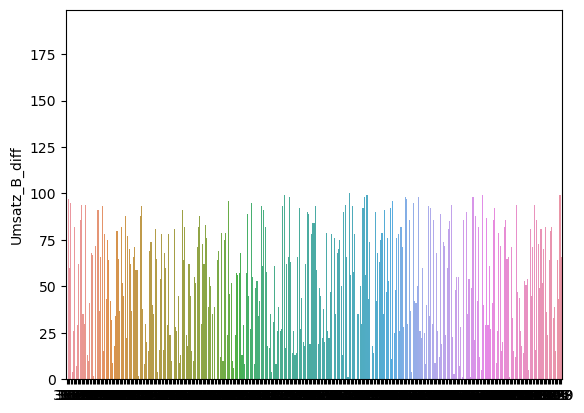

In [283]:
sns.barplot(x=df_b_1.index, y=df_b_1['Umsatz_B_diff'], data=df_b_1)

# Show the plot
plt.show()

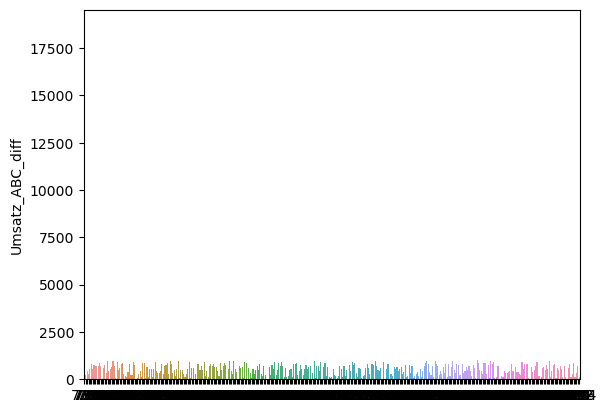

In [284]:
sns.barplot(x=df_abc_1.index, y=df_abc_1['Umsatz_ABC_diff'], data=df_abc_1)

# Show the plot
plt.show()

In [287]:
#df_b_1.rename(columns={'Umsatz' : 'Umsatz_B'}, inplace=True)
df_b_1= df_b_1[['Datum', 'Umsatz_B_diff']]
df_b_1.head()

,Datum,Umsatz_B_diff
365,2021-01-01,189.467425
366,2021-02-01,97.000000
367,2021-03-01,60.000000
368,2021-04-01,95.000000
369,2021-05-01,4.000000


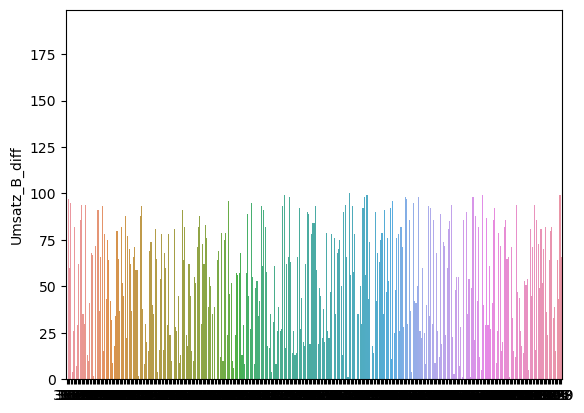

In [289]:
sns.barplot(x=df_b_1.index, y=df_b_1['Umsatz_B_diff'], data=df_b_1)

# Show the plot
plt.show()

In [305]:
df_ab = df_a.merge(df_b, on='Datum')
df_abc_1 = df_ab.merge(df_abc, on='Datum') 

df_abc_1

,Datum,Umsatz_A,Umsatz_B,Umsatz_ABC
0,2021-01-01,17.132115,189.467425,18598.65588
1,2021-02-01,57.353725,286.467425,18809.41684
2,2021-03-01,114.746857,346.467425,19247.89036
3,2021-04-01,113.251181,441.467425,19511.08905
4,2021-05-01,4.186462,445.467425,20047.04458
...,...,...,...,...
360,2021-12-27,48.681712,18261.467430,197909.24160
361,2021-12-28,54.774542,18325.467430,198014.84050
362,2021-12-29,151.450508,18368.467430,198355.27600
363,2021-12-30,39.406492,18467.467430,199081.44610


In [306]:
df_abc_1['Umsatz_C'] = df_abc_1['Umsatz_ABC'] - df_abc_1['Umsatz_A'] - df_abc_1['Umsatz_B']
df_abc_1.head()

,Datum,Umsatz_A,Umsatz_B,Umsatz_ABC,Umsatz_C
0,2021-01-01,17.132115,189.467425,18598.65588,18392.056339
1,2021-02-01,57.353725,286.467425,18809.41684,18465.595689
2,2021-03-01,114.746857,346.467425,19247.89036,18786.676078
3,2021-04-01,113.251181,441.467425,19511.08905,18956.370443
4,2021-05-01,4.186462,445.467425,20047.04458,19597.390692


In [307]:
df_abc_1['diff_C'] = df_abc_1['Umsatz_C'].diff().fillna(0)

df_abc_1.head()

,Datum,Umsatz_A,Umsatz_B,Umsatz_ABC,Umsatz_C,diff_C
0,2021-01-01,17.132115,189.467425,18598.65588,18392.056339,0.000000
1,2021-02-01,57.353725,286.467425,18809.41684,18465.595689,73.539350
2,2021-03-01,114.746857,346.467425,19247.89036,18786.676078,321.080388
3,2021-04-01,113.251181,441.467425,19511.08905,18956.370443,169.694366
4,2021-05-01,4.186462,445.467425,20047.04458,19597.390692,641.020249


In [332]:
df_abc_1['diff_C'][0] = df_abc_1['Umsatz_C'][0] # - df_abc_1['Umsatz_A'][0] - df_abc_1['Umsatz_B'][0]
df_c_1 = df_abc_1[['Datum', 'diff_C']]
df_c_1.head()

C:\Users\User\AppData\Local\Temp\ipykernel_8012\4143833041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abc_1['diff_C'][0] = df_abc_1['Umsatz_C'][0] # - df_abc_1['Umsatz_A'][0] - df_abc_1['Umsatz_B'][0]


,Datum,diff_C
0,2021-01-01,18392.056339
1,2021-02-01,73.539350
2,2021-03-01,321.080388
3,2021-04-01,169.694366
4,2021-05-01,641.020249


In [309]:
df_c_1.rename(columns={'diff_C' : 'Umsatz_C_diff'}, inplace=True)
df_c_1.head()

C:\Users\User\AppData\Local\Temp\ipykernel_8012\3403761110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c_1.rename(columns={'diff_C' : 'Umsatz_C_diff'}, inplace=True)


,Datum,Umsatz_C_diff
0,2021-01-01,18392.056339
1,2021-02-01,73.539350
2,2021-03-01,321.080388
3,2021-04-01,169.694366
4,2021-05-01,641.020249


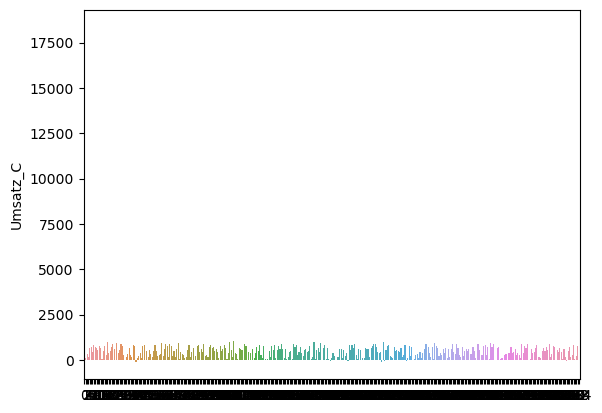

In [302]:
sns.barplot(x=df_c_1.index, y=df_c_1['Umsatz_C'], data=df_c_1)

# Show the plot
plt.show()

In [311]:
df = df_a.merge(df_b_1, on='Datum') 
df = df.merge(df_c_1, on='Datum')
df.head()

,Datum,Umsatz_A,Umsatz_B_diff,Umsatz_C_diff
0,2021-01-01,17.132115,189.467425,18392.056339
1,2021-02-01,57.353725,97.000000,73.539350
2,2021-03-01,114.746857,60.000000,321.080388
3,2021-04-01,113.251181,95.000000,169.694366
4,2021-05-01,4.186462,4.000000,641.020249


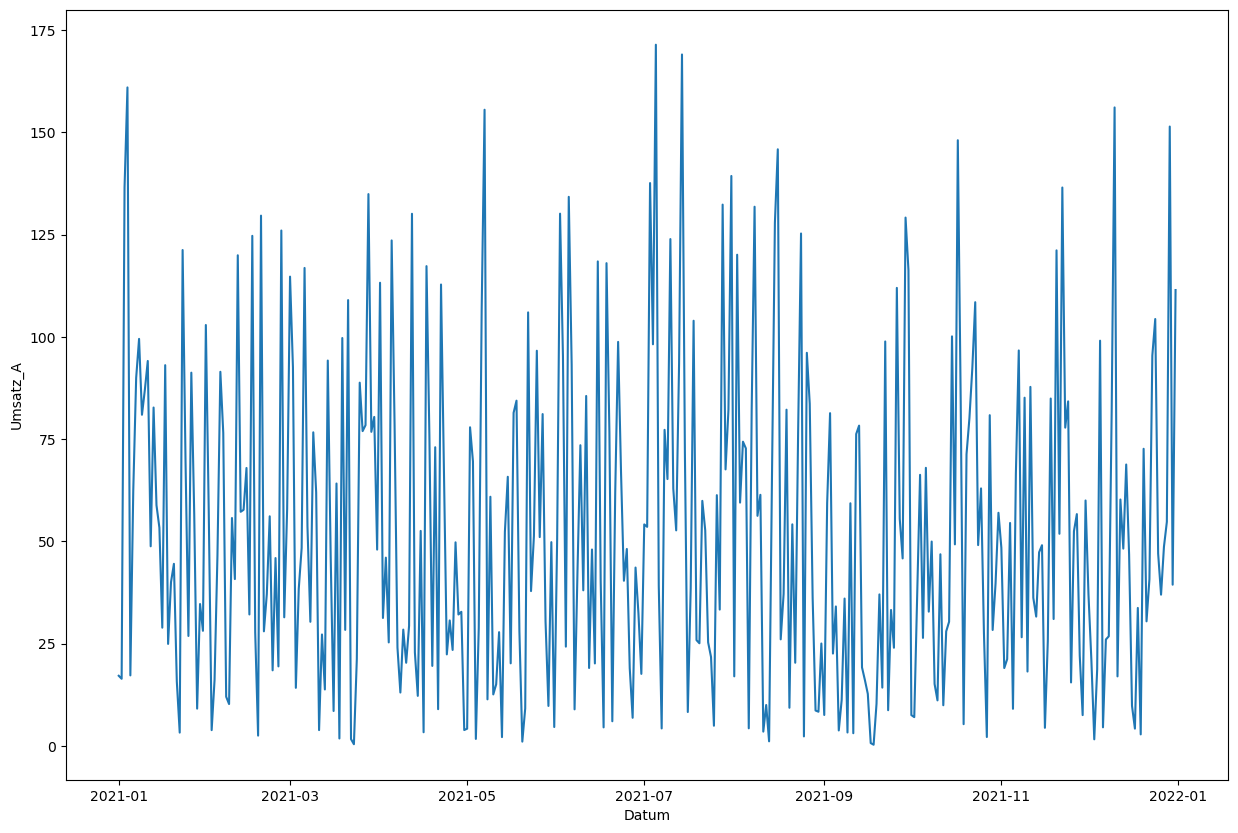

In [343]:
sns.lineplot(x=df['Datum'], y=df['Umsatz_A'], data=df)
#sns.lineplot(x=df['Datum'], y=df['Umsatz_B_diff'], data=df)
#sns.lineplot(x=df['Datum'], y=df['Umsatz_C_diff'], data=df)
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 15]
plt.show()

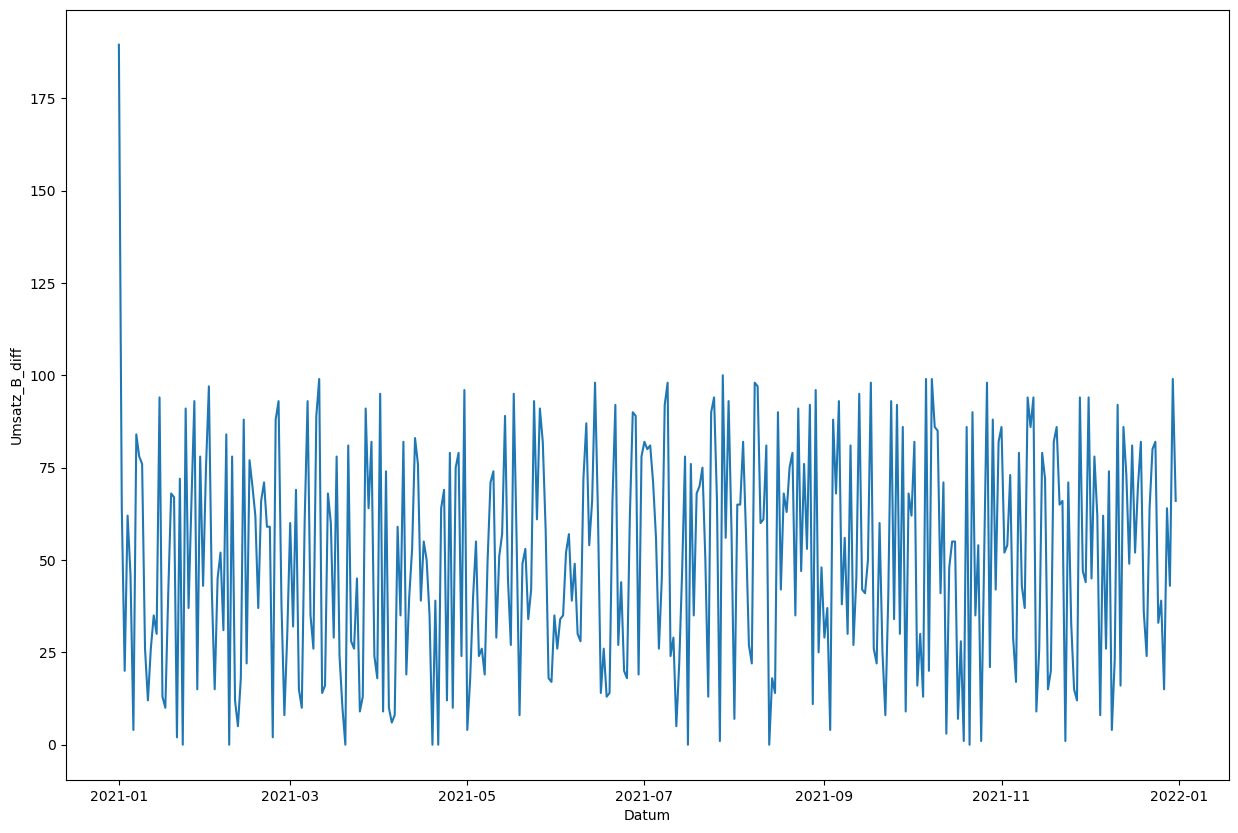

In [330]:
#sns.lineplot(x=df['Datum'], y=df['Umsatz_A'], data=df)
sns.lineplot(x=df['Datum'], y=df['Umsatz_B_diff'], data=df)
#sns.lineplot(x=df['Datum'], y=df['Umsatz_C_diff'], data=df)
plt.show()

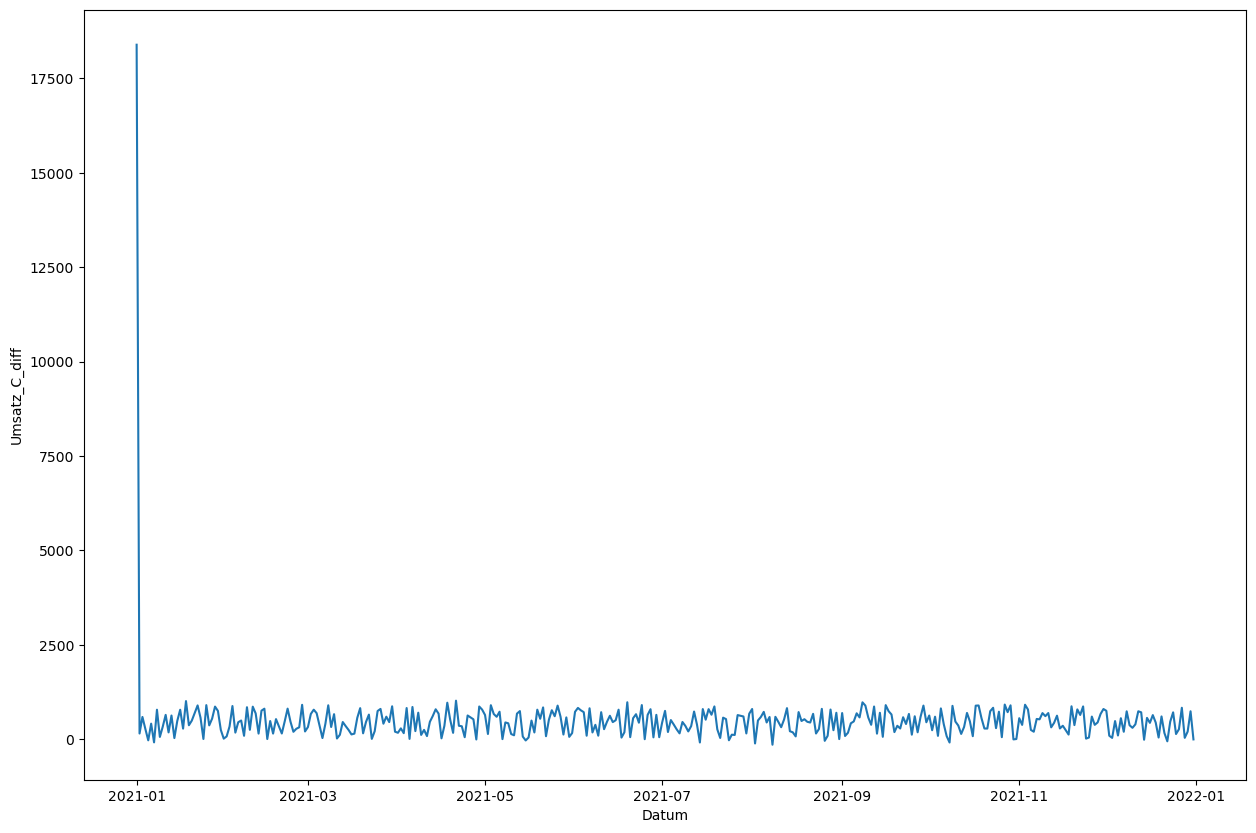

In [331]:
#sns.lineplot(x=df['Datum'], y=df['Umsatz_A'], data=df)
#sns.lineplot(x=df['Datum'], y=df['Umsatz_B_diff'], data=df)
sns.lineplot(x=df['Datum'], y=df['Umsatz_C_diff'], data=df)
plt.show()

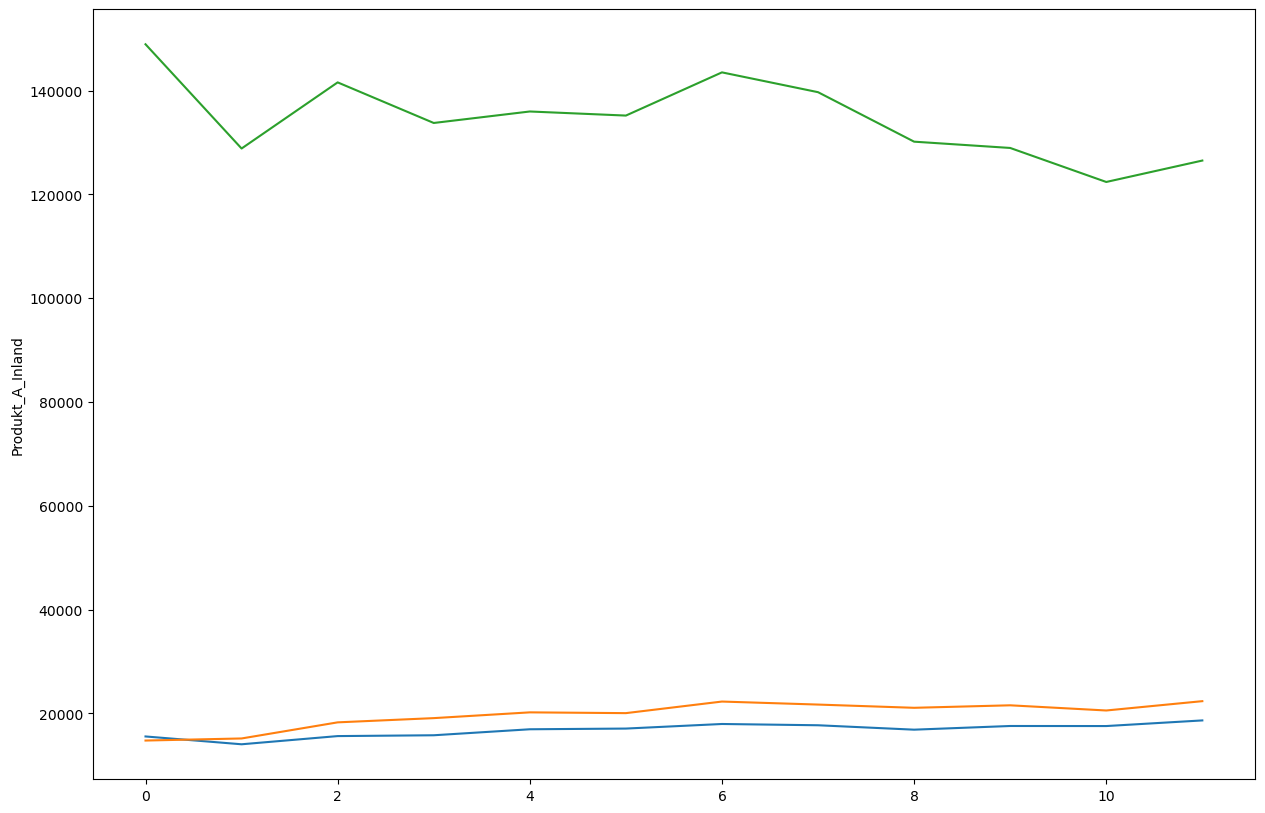

In [336]:
sns.lineplot(x=df_inland.index, y=df_inland['Produkt_A_Inland'], data=df_inland)
sns.lineplot(x=df_inland.index, y=df_inland['Produkt_B_Inland'], data=df_inland)
sns.lineplot(x=df_inland.index, y=df_inland['Produkt_C_Inland'], data=df_inland)
# Show the plot
plt.show()


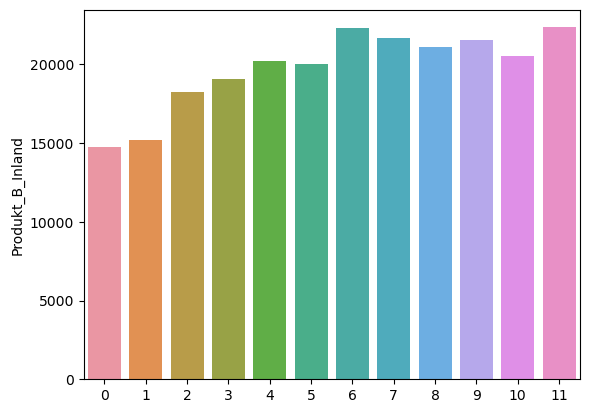

In [293]:
sns.barplot(x=df_inland.index, y=df_inland['Produkt_B_Inland'], data=df_inland)

# Show the plot
plt.show()

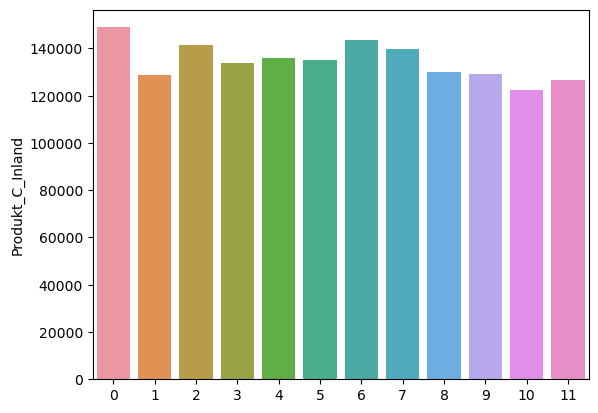

In [294]:
sns.barplot(x=df_inland.index, y=df_inland['Produkt_C_Inland'], data=df_inland)

# Show the plot
plt.show()